In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score as acc_s
from sklearn.metrics import mean_absolute_error as abe

In [6]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [8]:
df = pd.read_csv("src//banking_updated.csv",sep=',')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype=object)

In [14]:
df.drop(['duration','contact', 'month', 'day_of_week', 'default','pdays'],axis=1,inplace=True)

In [16]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,yes,no,1,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,1,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,3,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,2,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,1,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [17]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
housing           0
loan              0
campaign          0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [18]:
df.replace(['basic.4y','basic.6y','basic.9y'],'basic',inplace=True)

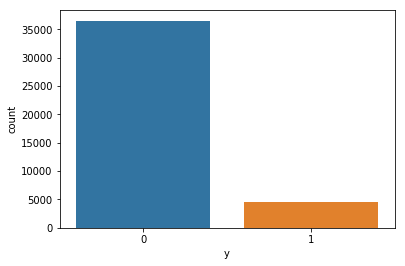

In [19]:
sns.countplot(x='y',data=df)

In [20]:
df.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan',
       'campaign', 'previous', 'poutcome', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype=object)

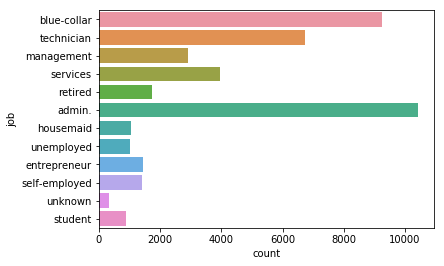

In [21]:
sns.countplot(y='job',data=df)

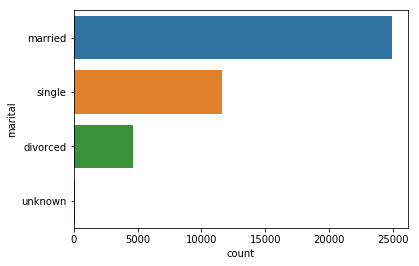

In [22]:
sns.countplot(y='marital',data=df)

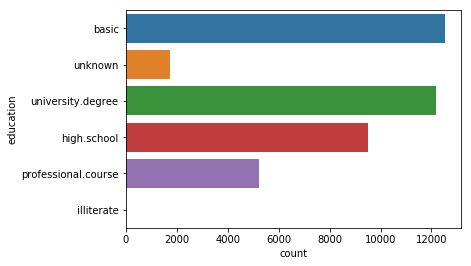

In [25]:
sns.countplot(y='education',data=df)

In [28]:
df.education.value_counts()

basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [29]:
le = preprocessing.LabelEncoder()

In [35]:
df.job = le.fit_transform(df.job)
df.marital = le.fit_transform(df.marital)
df.loan = le.fit_transform(df.loan)
df.poutcome = le.fit_transform(df.poutcome)
df.education = le.fit_transform(df.education)
df.housing = le.fit_transform(df.housing)

In [36]:
df.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,1,1,0,2,0,1,0,1,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,1,5,0,0,1,0,1,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,4,2,4,2,0,3,2,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,7,1,1,0,0,2,0,1,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,1,0,2,0,1,1,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [39]:
Y = df.y
df.drop('y',axis=1,inplace=True)

In [40]:
x_train, x_test , y_train, y_test = model_selection.train_test_split(df,Y,test_size=0.2,random_state=0)

In [41]:
x_train.shape ,y_train.shape

((32950, 14), (32950,))

In [42]:
x_test.shape , y_test.shape

((8238, 14), (8238,))

In [46]:
model = LogisticRegression(penalty='l2',max_iter=1000)

In [47]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
prediction=model.predict(x_test)

In [55]:
acc_s(y_test,prediction)
#abe(y_test,prediction)

0.902282107307599

In [56]:
from sklearn.svm import SVC

In [57]:
model = SVC()

In [58]:
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
predict = model.predict(x_test)

In [62]:
acc_s(y_test,predict)

0.8923282350084972

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
model = RandomForestClassifier()

In [65]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
predict = model.predict(x_test)

In [68]:
acc_s(y_test,predict)

0.8922068463219228